In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pickle
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

In [8]:
path_string = '../results/AdaptivePara.seqs'
with open(path_string,'rb') as f:
    data = pickle.load(f)

<function matplotlib.pyplot.show(*args, **kw)>

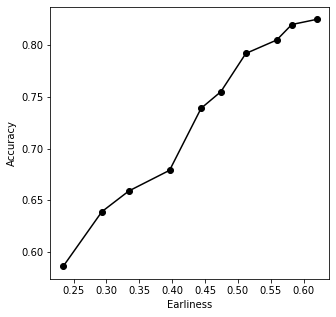

In [9]:
plt.figure(figsize=(5,5))
plt.plot(data[0], data[1],c='black',marker='o')
plt.xlabel('Earliness')
plt.ylabel('Accuracy')
plt.show

In [27]:
path_string = '../results/LossUncertainty.seqs'
with open(path_string,'rb') as f:
    result = pickle.load(f)

In [28]:
x=[x for x in range(30)]
func3 = interpolate.interp1d(x, result[0], kind='quadratic')
func4 = interpolate.interp1d(x, result[1], kind='quadratic')
x2=np.arange(0,29,0.1)
y2=func3(x2)
u2=func4(x2)

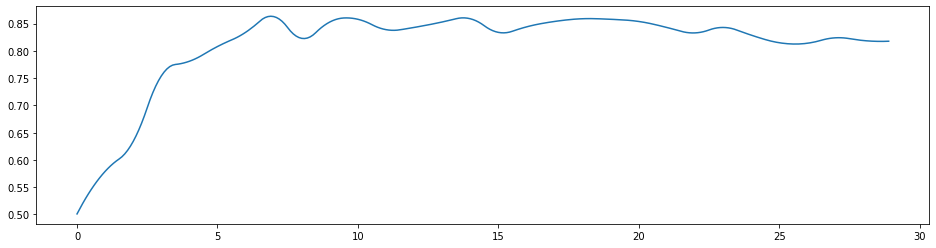

In [29]:
plt.figure(figsize=(16,4))
plt.plot(x2, y2)
plt.show()

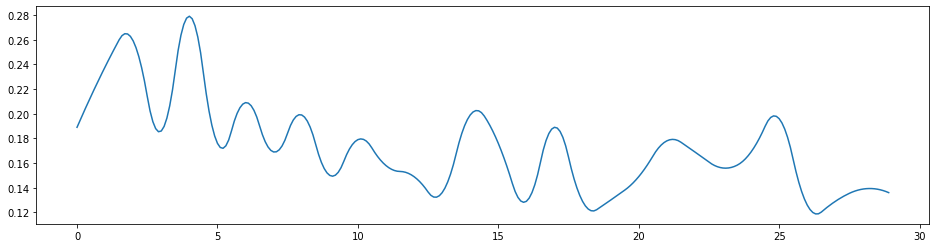

In [30]:
plt.figure(figsize=(16,4))
plt.plot(x2, u2)
plt.show()

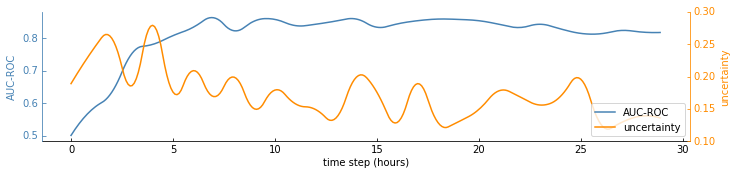

In [31]:
plt.figure(figsize=(10,2))
fig = plt.figure(1) 
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
#append axes
ax_cof.parasites.append(ax_temp)
#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('AUC-ROC')
ax_cof.set_xlabel('time step (hours)')
ax_temp.set_ylabel('uncertainty')
fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''
curve_cof = ax_cof.plot(x2, y2, label="AUC-ROC", color='steelblue')
curve_temp = ax_temp.plot(x2, u2, label="uncertainty", color='darkorange')

ax_temp.set_ylim(0.1,0.3)
ax_cof.legend()

ax_cof.axis['left'].label.set_color('steelblue')
ax_temp.axis['right'].label.set_color('darkorange')

ax_cof.axis['left'].major_ticks.set_color('steelblue')
ax_temp.axis['right'].major_ticks.set_color('darkorange')

ax_cof.axis['left'].major_ticklabels.set_color('steelblue')
ax_temp.axis['right'].major_ticklabels.set_color('darkorange')

ax_cof.axis['left'].line.set_color('steelblue')
ax_temp.axis['right'].line.set_color('darkorange')


plt.show()

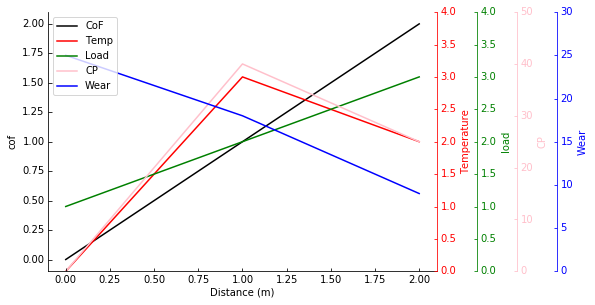

In [26]:
#test

fig = plt.figure(1) 
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes
ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)


#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('cof')
ax_cof.set_xlabel('Distance (m)')
ax_temp.set_ylabel('Temperature')
ax_load.set_ylabel('load')
ax_cp.set_ylabel('CP')
ax_wear.set_ylabel('Wear')

load_axisline = ax_load.get_grid_helper().new_fixed_axis
cp_axisline = ax_cp.get_grid_helper().new_fixed_axis
wear_axisline = ax_wear.get_grid_helper().new_fixed_axis

ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))
ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''

curve_cof, = ax_cof.plot([0, 1, 2], [0, 1, 2], label="CoF", color='black')
curve_temp, = ax_temp.plot([0, 1, 2], [0, 3, 2], label="Temp", color='red')
curve_load, = ax_load.plot([0, 1, 2], [1, 2, 3], label="Load", color='green')
curve_cp, = ax_cp.plot([0, 1, 2], [0, 40, 25], label="CP", color='pink')
curve_wear, = ax_wear.plot([0, 1, 2], [25, 18, 9], label="Wear", color='blue')


ax_temp.set_ylim(0,4)
ax_load.set_ylim(0,4)
ax_cp.set_ylim(0,50)
ax_wear.set_ylim(0,30)

ax_cof.legend()

#ax_cof.axis['left'].label.set_color(ax_cof.get_color())
ax_temp.axis['right'].label.set_color('red')
ax_load.axis['right2'].label.set_color('green')
ax_cp.axis['right3'].label.set_color('pink')
ax_wear.axis['right4'].label.set_color('blue')

ax_temp.axis['right'].major_ticks.set_color('red')
ax_load.axis['right2'].major_ticks.set_color('green')
ax_cp.axis['right3'].major_ticks.set_color('pink')
ax_wear.axis['right4'].major_ticks.set_color('blue')

ax_temp.axis['right'].major_ticklabels.set_color('red')
ax_load.axis['right2'].major_ticklabels.set_color('green')
ax_cp.axis['right3'].major_ticklabels.set_color('pink')
ax_wear.axis['right4'].major_ticklabels.set_color('blue')

ax_temp.axis['right'].line.set_color('red')
ax_load.axis['right2'].line.set_color('green')
ax_cp.axis['right3'].line.set_color('pink')
ax_wear.axis['right4'].line.set_color('blue')

plt.show()